<a href="https://colab.research.google.com/github/Nayana-manoharan/DeepLearning/blob/main/VGG_19_Hand_written_digits_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Lambda,Dropout
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

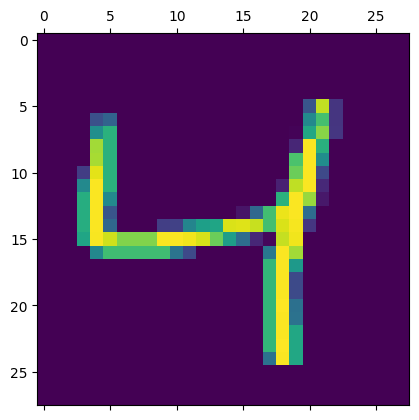

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Define the model
model = Sequential([
    # Reshape and convert grayscale to RGB
    Lambda(lambda x: tf.image.grayscale_to_rgb(tf.image.resize(tf.expand_dims(x, axis=-1), (224, 224)))),

    # Add the pre-trained MobileNetV2 model
    base_model,

    # Flatten the output
    Flatten(),

    # Dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)




80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 320s 179ms/step - accuracy: 0.6236 - loss: 1.2806 - val_accuracy: 0.9788 - val_loss: 0.1014
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 315s 183ms/step - accuracy: 0.9509 - loss: 0.2083 - val_accuracy: 0.9860 - val_loss: 0.0543
Epoch 3/10
1165/1688 ━━━━━━━━━━━━━━━━━━━━ 1:21 157ms/step - accuracy: 0.9687 - loss: 0.1216

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9917


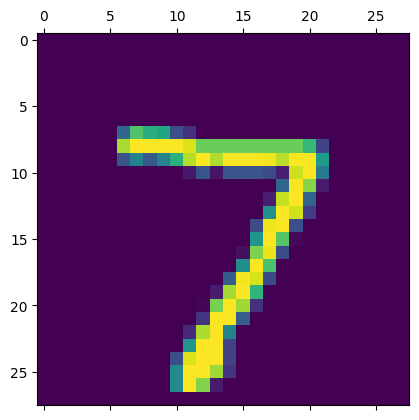

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted=model.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step


array([1.02582046e-13, 9.51842424e-11, 2.97212970e-12, 8.05701816e-16,
       2.42645937e-14, 2.12943473e-13, 3.45982412e-13, 1.00000000e+00,
       6.39557960e-13, 2.42267652e-14], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1133,    1,    0,    0,    0,    0,    1,    0,    0],
       [   1,    1, 1026,    1,    0,    0,    0,    3,    0,    0],
       [   0,    0,    3,  994,    0,    8,    0,    1,    3,    1],
       [   0,    0,    0,    0,  973,    0,    0,    2,    0,    7],
       [   1,    0,    1,    1,    1,  883,    2,    2,    0,    1],
       [   4,    3,    0,    0,    2,    1,  947,    0,    0,    1],
       [   0,    5,    2,    0,    0,    1,    0, 1018,    0,    2],
       [   0,    0,    1,    2,    2,    2,    1,    0,  964,    2],
       [   1,    0,    0,    1,    4,    0,    0,    2,    0, 1001]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

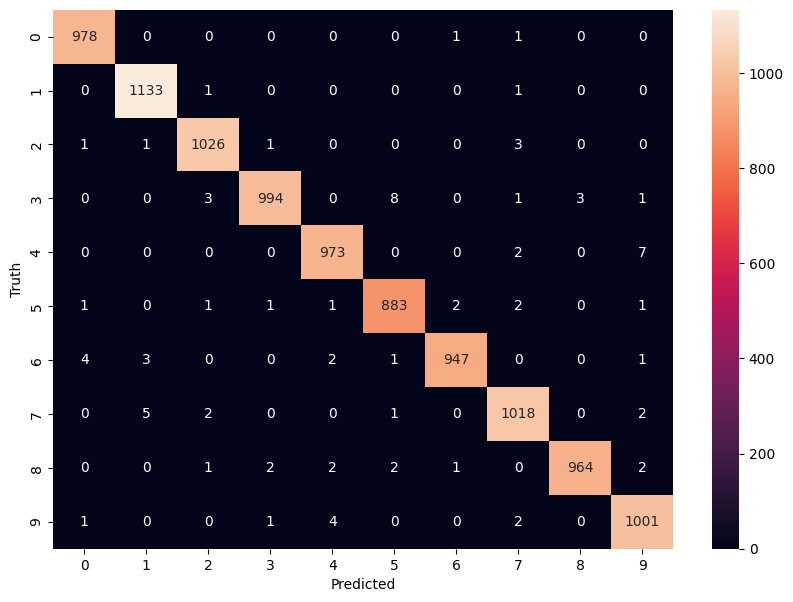

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Fine-tuning
# Unfreeze the top layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-6),  # Lower learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(X_train, y_train,
                         batch_size=32,
                         epochs=5,
                         validation_split=0.1,
                         verbose=1)



Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 94s 47ms/step - accuracy: 0.9506 - loss: 0.1712 - val_accuracy: 0.9900 - val_loss: 0.0398
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 127s 42ms/step - accuracy: 0.9770 - loss: 0.0720 - val_accuracy: 0.9897 - val_loss: 0.0398
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.9820 - loss: 0.0538 - val_accuracy: 0.9898 - val_loss: 0.0375
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9875 - loss: 0.0404 - val_accuracy: 0.9903 - val_loss: 0.0358
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9915 - val_loss: 0.0342


In [ ]:
# Final evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final test accuracy: {test_accuracy:.4f}")


Final test accuracy: 0.1028


In [ ]:
# Save the model
model.save('mobilenet_mnist.h5')

In [ ]:
y_predicted1=model.predict(X_test)
y_predicted_labels1=[np.argmax(i) for i in y_predicted1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [ ]:
cm1=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,    0,    0,    0,    0,    0,    0,  980,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1135,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1032,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1010,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  982,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  892,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  958,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  974,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1009,    0,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

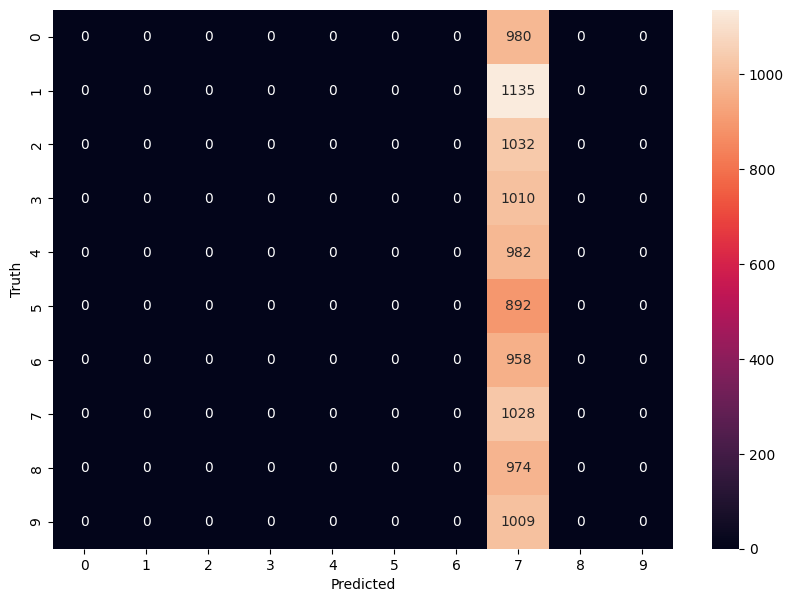

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')